# Depression Analysis

In [848]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('final_depression_dataset_1.csv')

data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


## Data Cleaning

In [850]:
# Percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.330203
Academic Pressure                        80.359937
Work Pressure                            19.640063
CGPA                                     80.359937
Study Satisfaction                       80.359937
Job Satisfaction                         19.640063
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

With 80% of some collumns being null we will just drop them from the data entirely. Using the 50% threshhold we will drop all data that is more than 50% null, the rest will be filled to properly analyze. 

In [852]:
# Drop columns with more than 50% null values
valid_columns = data.columns[data.isnull().sum() / len(data) < 0.5]
data = data.loc[:, valid_columns]
data

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,2.0,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,4.0,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,2.0,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,3.0,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,4.0,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,1.0,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,3.0,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,1.0,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,2.0,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [853]:
##data['Work Pressure'].unique()
data['Job Satisfaction'].unique()

array([ 4.,  3.,  5.,  2.,  1., nan])

In [854]:
# Replacing numeric categorical data to categorical
data['Work Pressure'] = data['Work Pressure'].map({1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'})
data['Job Satisfaction'] = data['Job Satisfaction'].map({1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'})

# Replacing categorical null values with a 'Unknown" category
data['Profession'] = data['Profession'].fillna('Unknown')

# Converting categorical columns to numerical values
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Working Professional or Student'] = data['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})  
data['Depression'] = data['Depression'].map({'Yes': 1, 'No': 0})
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
data['Suicidal Thoughts'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

# Cleaning sleep_duration by averaging the values
sleep_duration_mapping = {
    "7-8 hours": 7.5,
    "5-6 hours": 5.5,
    "Less than 5 hours": 4.5,
    "More than 8 hours": 8.5
}

# Map text values to numerical values
data['Sleep Duration'] = data['Sleep Duration'].map(sleep_duration_mapping)

data

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Suicidal Thoughts
0,Pooja,0,37,Ghaziabad,1,Teacher,Disagree,Agree,7.5,Moderate,MA,No,6,2,0,0,0
1,Reyansh,1,60,Kalyan,1,Financial Analyst,Agree,Neutral,5.5,Unhealthy,B.Com,Yes,0,4,1,0,1
2,Manvi,0,42,Bhopal,1,Teacher,Disagree,Neutral,5.5,Moderate,M.Com,No,0,2,0,0,0
3,Isha,0,44,Thane,1,Teacher,Neutral,Strongly Agree,7.5,Healthy,MD,Yes,1,2,1,0,1
4,Aarav,1,48,Indore,1,UX/UI Designer,Agree,Neutral,7.5,Moderate,BE,Yes,6,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,1,25,Bangalore,1,Consultant,Strongly Disagree,Strongly Agree,5.5,Healthy,BBA,Yes,12,3,1,0,1
2552,Pihu,0,23,Pune,1,Teacher,Neutral,Strongly Disagree,4.5,Moderate,MA,Yes,8,3,0,1,1
2553,Sara,0,24,Srinagar,1,HR Manager,Strongly Disagree,Agree,4.5,Moderate,BA,Yes,4,4,0,0,1
2554,Eshita,0,56,Bangalore,1,Business Analyst,Disagree,Neutral,7.5,Healthy,BBA,No,4,5,1,0,0


In [855]:
# Check for missing values
null_data_count = data.isnull().sum()
null_data_count

Name                                       0
Gender                                     0
Age                                        0
City                                       0
Working Professional or Student            0
Profession                                 0
Work Pressure                            502
Job Satisfaction                         502
Sleep Duration                             0
Dietary Habits                             0
Degree                                     0
Have you ever had suicidal thoughts ?      0
Work/Study Hours                           0
Financial Stress                           0
Family History of Mental Illness           0
Depression                                 0
Suicidal Thoughts                          0
dtype: int64

# Exploratory Data Analysis (EDA)
* Descriptive statistics like mean, median, range, correlations* Data visualizations for univariate and multivariate explorationn

# Summary

In [858]:
# Create a summary DataFrame
summary = pd.DataFrame({
    "Non-Null Count": data.notnull().sum(),
    "Data Type": data.dtypes,
    "Unique Values": data.nunique()
})

# Display the summary
summary

,Non-Null Count,Data Type,Unique Values
Name,2556,object,216
Gender,2556,int64,2
Age,2556,int64,43
City,2556,object,30
Working Professional or Student,2556,int64,2
Profession,2556,object,36
Work Pressure,2054,object,5
Job Satisfaction,2054,object,5
Sleep Duration,2556,float64,4
Dietary Habits,2556,object,3


In [859]:
describe_data = data.describe().T
describe_data

,count,mean,std,min,25%,50%,75%,max
Gender,2556.0,0.521518,0.499635,0.0,0.0,1.0,1.0,1.0
Age,2556.0,39.043036,12.260596,18.0,28.0,39.0,50.0,60.0
Working Professional or Student,2556.0,0.803599,0.397353,0.0,1.0,1.0,1.0,1.0
Sleep Duration,2556.0,6.491393,1.578452,4.5,4.5,7.5,7.5,8.5
Work/Study Hours,2556.0,6.023865,3.771743,0.0,3.0,6.0,9.0,12.0
Financial Stress,2556.0,2.968701,1.415527,1.0,2.0,3.0,4.0,5.0
Family History of Mental Illness,2556.0,0.487089,0.499931,0.0,0.0,0.0,1.0,1.0
Depression,2556.0,0.178013,0.382598,0.0,0.0,0.0,0.0,1.0
Suicidal Thoughts,2556.0,0.488654,0.499969,0.0,0.0,0.0,1.0,1.0


In [861]:
# Range (max - min)
data_range = data.max(numeric_only=True) - data.min(numeric_only=True)
print("Range:\n", data_range)

# Variance
data_variance = data.var(numeric_only=True)
print("Variance:\n", data_variance)

# Skewness (asymmetry of data distribution)
data_skewness = data.skew(numeric_only=True)
print("Skewness:\n", data_skewness)

# Kurtosis (tail heaviness)
data_kurtosis = data.kurt(numeric_only=True)
print("Kurtosis:\n", data_kurtosis)


Range:
 Gender                               1.0
Age                                 42.0
Working Professional or Student      1.0
Sleep Duration                       4.0
Work/Study Hours                    12.0
Financial Stress                     4.0
Family History of Mental Illness     1.0
Depression                           1.0
Suicidal Thoughts                    1.0
dtype: float64
Variance:
 Gender                                0.249635
Age                                 150.322218
Working Professional or Student       0.157889
Sleep Duration                        2.491511
Work/Study Hours                     14.226045
Financial Stress                      2.003717
Family History of Mental Illness      0.249931
Depression                            0.146381
Suicidal Thoughts                     0.249969
dtype: float64
Skewness:
 Gender                             -0.086202
Age                                -0.005077
Working Professional or Student    -1.529307
Sleep Duratio

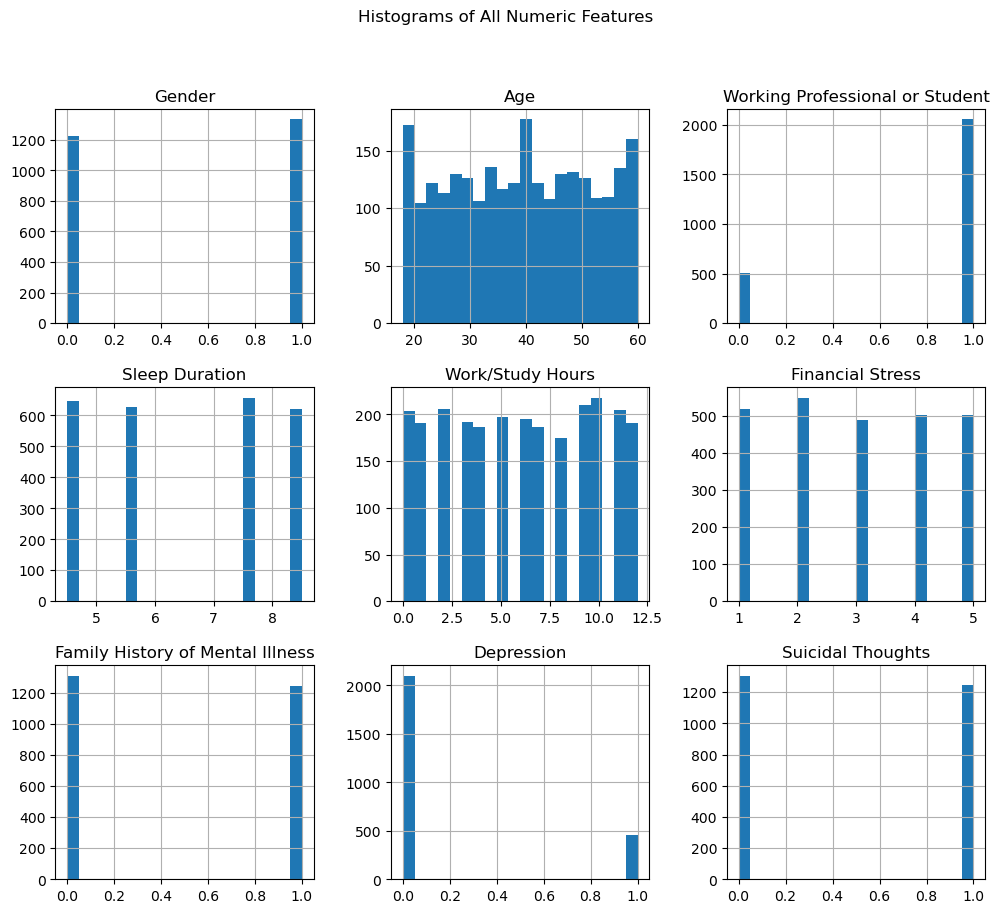

In [862]:
# Plot histograms for numeric columns
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of All Numeric Features")
plt.show()

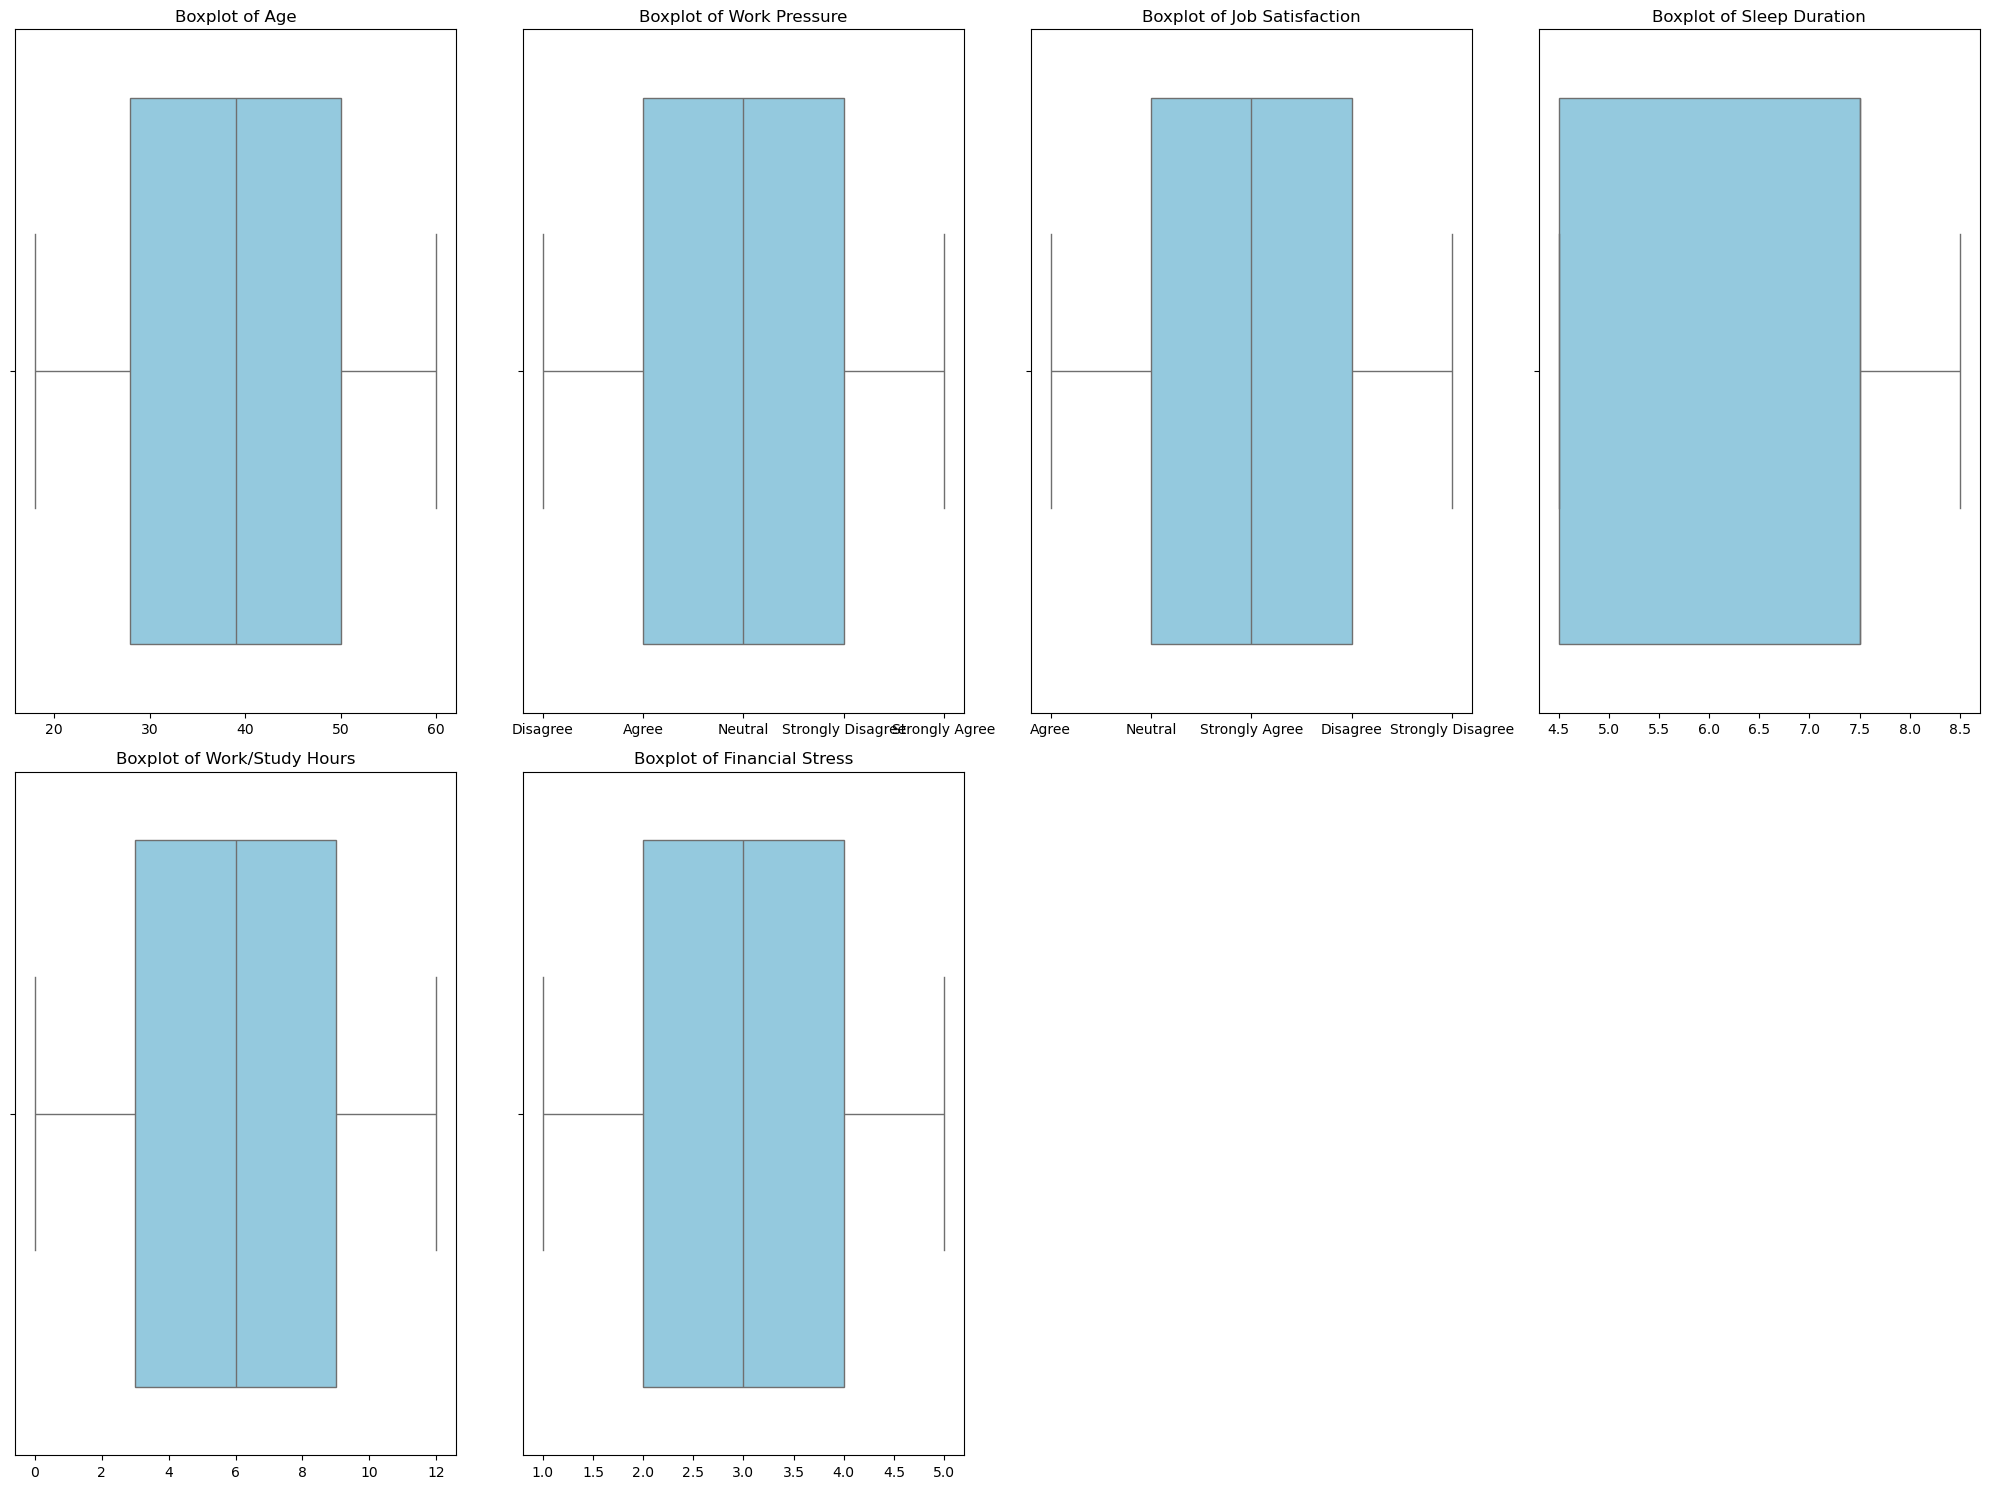

In [863]:
# Filter numerical columns that are not binary or constant
filtered_numeric_columns = [
    col for col in numeric_data.columns
    if data[col].nunique() > 2  # Exclude binary columns (columns with 2 unique values)
    and data[col].nunique() > 1  # Exclude constant columns (columns with 1 unique value)
]

# Define the number of rows and columns for the grid
n_cols = 4  # Number of columns
n_rows = int(np.ceil(len(filtered_numeric_columns) / n_cols))  # Calculate rows dynamically

# Create a figure and axes for the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten to iterate easily

# Plot a boxplot for each filtered numerical column
for i, column in enumerate(filtered_numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')
    
# Remove empty subplots
for j in range(len(filtered_numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [864]:
# Selecting numeric columns
numeric_data = data.select_dtypes(include=[np.number])

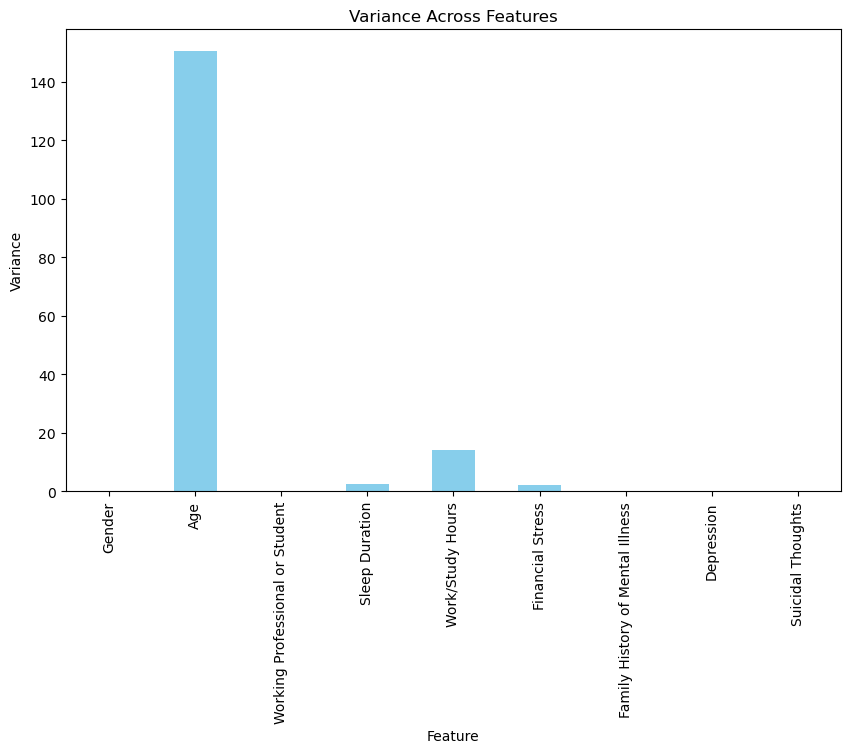

In [865]:
# Calculate variance for each numerical column
variances = numeric_data.var()

# Plot as a bar chart
variances.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Variance Across Features')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show()


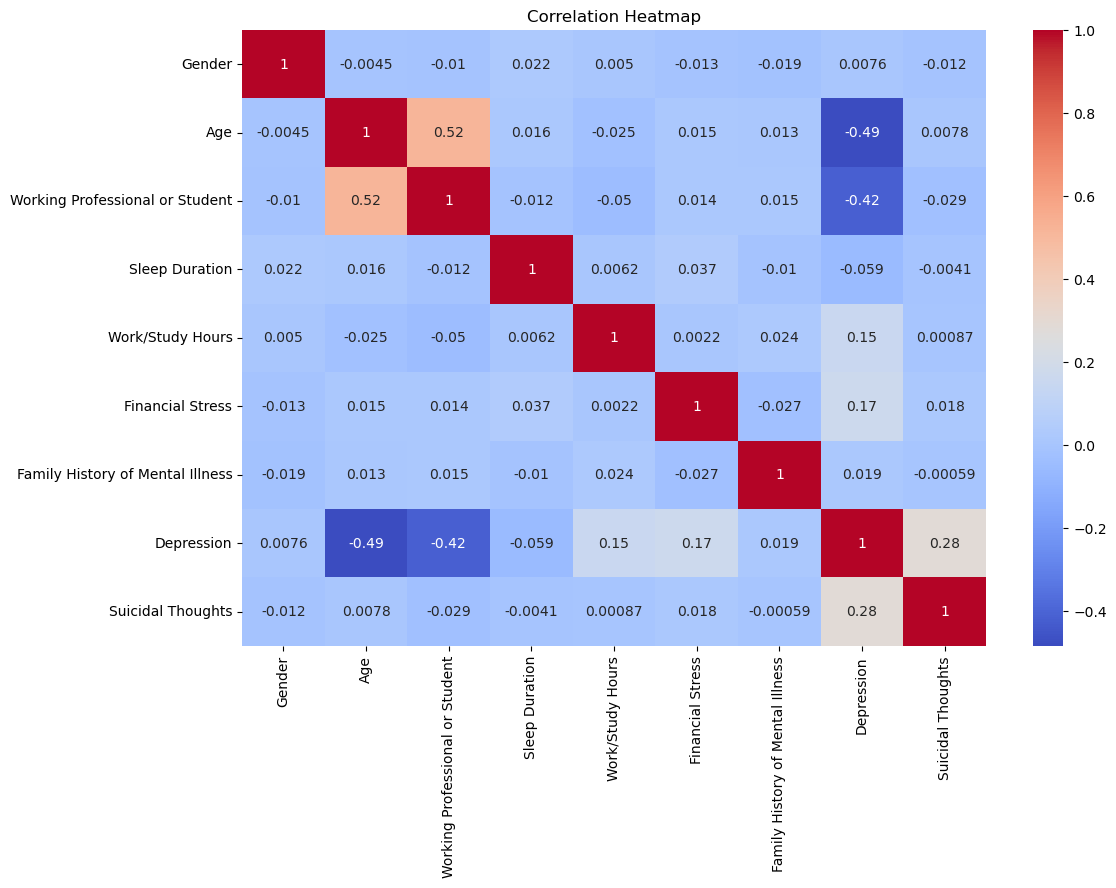

In [866]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [867]:
# Correlation of features with Depression
target_corr = numeric_data.corr()['Depression'].sort_values(ascending=False)
print("Correlation with Depression:\n", target_corr)

Correlation with Depression:
 Depression                          1.000000
Suicidal Thoughts                   0.281669
Financial Stress                    0.165669
Work/Study Hours                    0.152465
Family History of Mental Illness    0.019182
Gender                              0.007595
Sleep Duration                     -0.059030
Working Professional or Student    -0.418708
Age                                -0.485147
Name: Depression, dtype: float64


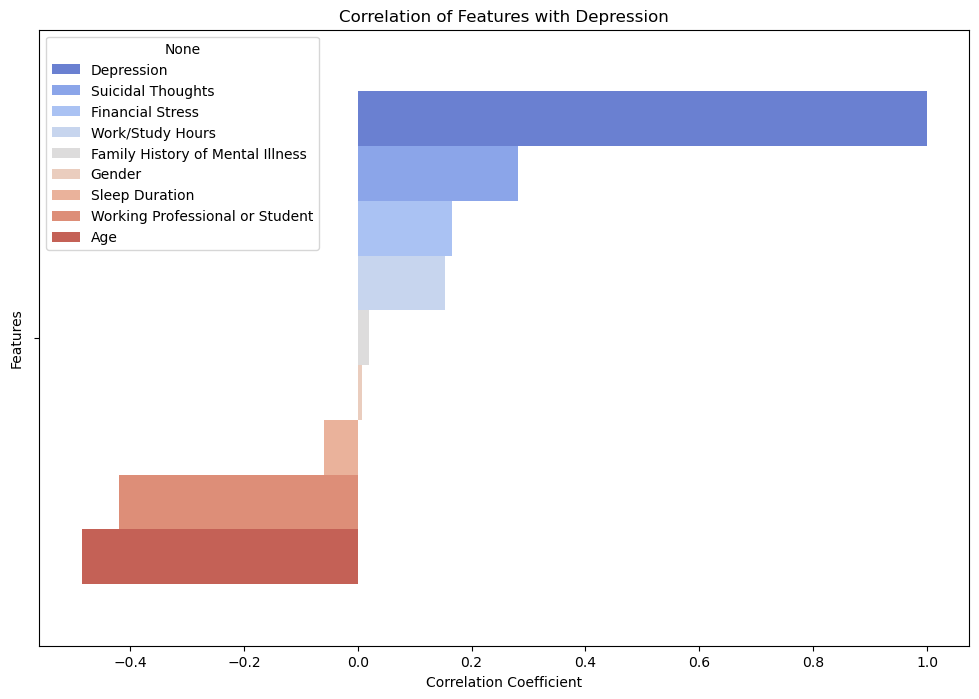

In [868]:
# Calculate correlations
target_corr = numeric_data.corr()['Depression'].sort_values(ascending=False)

# Plot as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corr.values, hue=target_corr.index, palette="coolwarm", legend=True)
plt.title("Correlation of Features with Depression")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

In [869]:
def plot_depression_by_category(data, category_column, palette="viridis"):
    # Calculate depression percentage for each category in the specified column
    depression_percentage = data.groupby(category_column)['Depression'].mean().sort_values(ascending=False)
    
    # Get the ordered categories
    category_order = depression_percentage.index
    
    # Create the plot with the specified palette
    plt.figure(figsize=(12, 8))
    sns.countplot(y=category_column, hue='Depression', data=data, palette=palette, order=category_order)
    plt.legend(title="Depression", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Depression by {category_column} (Ordered by Depression Percentage)')
    plt.show()

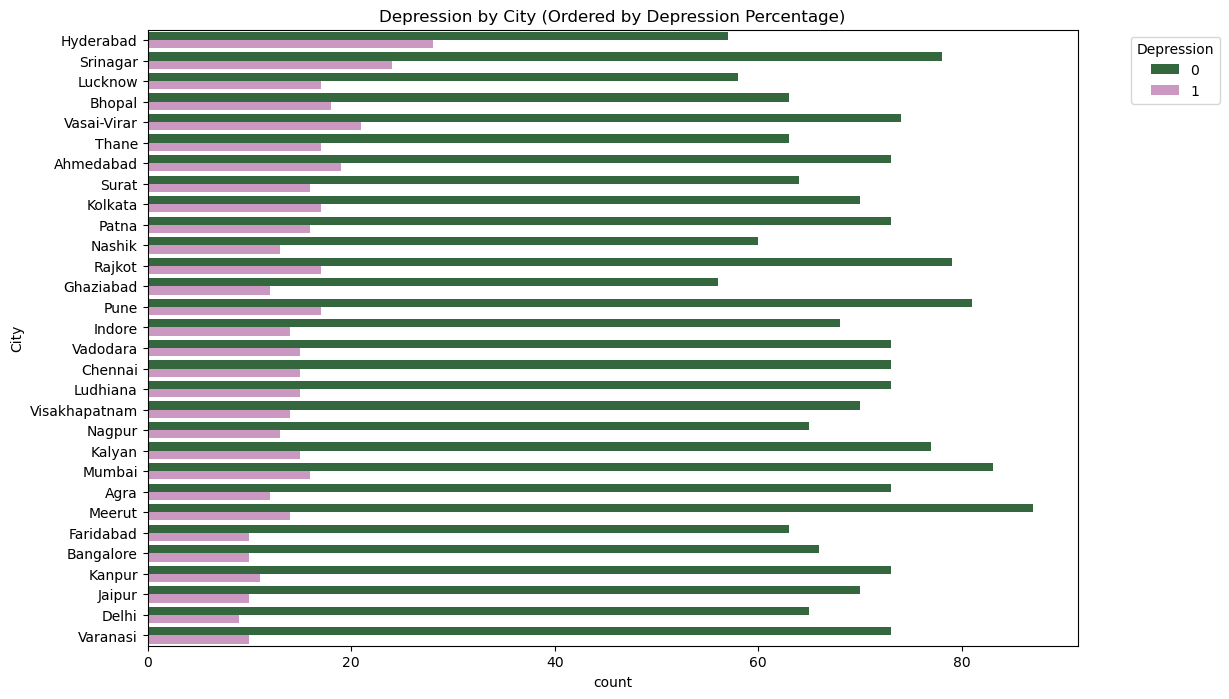

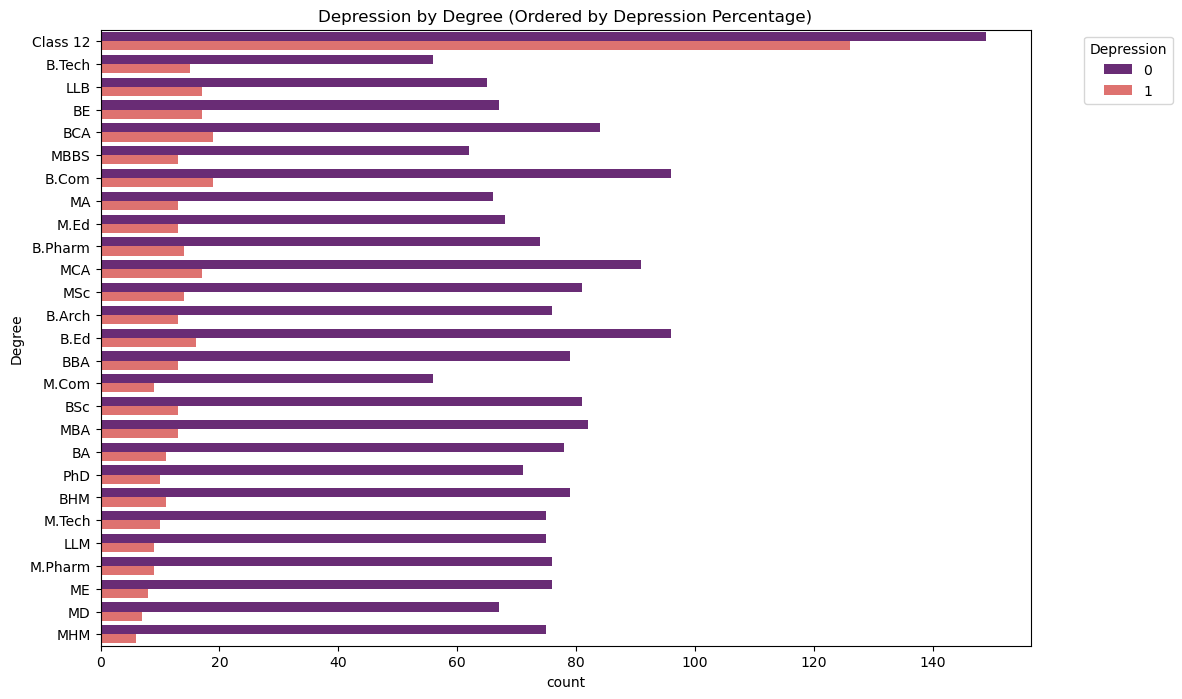

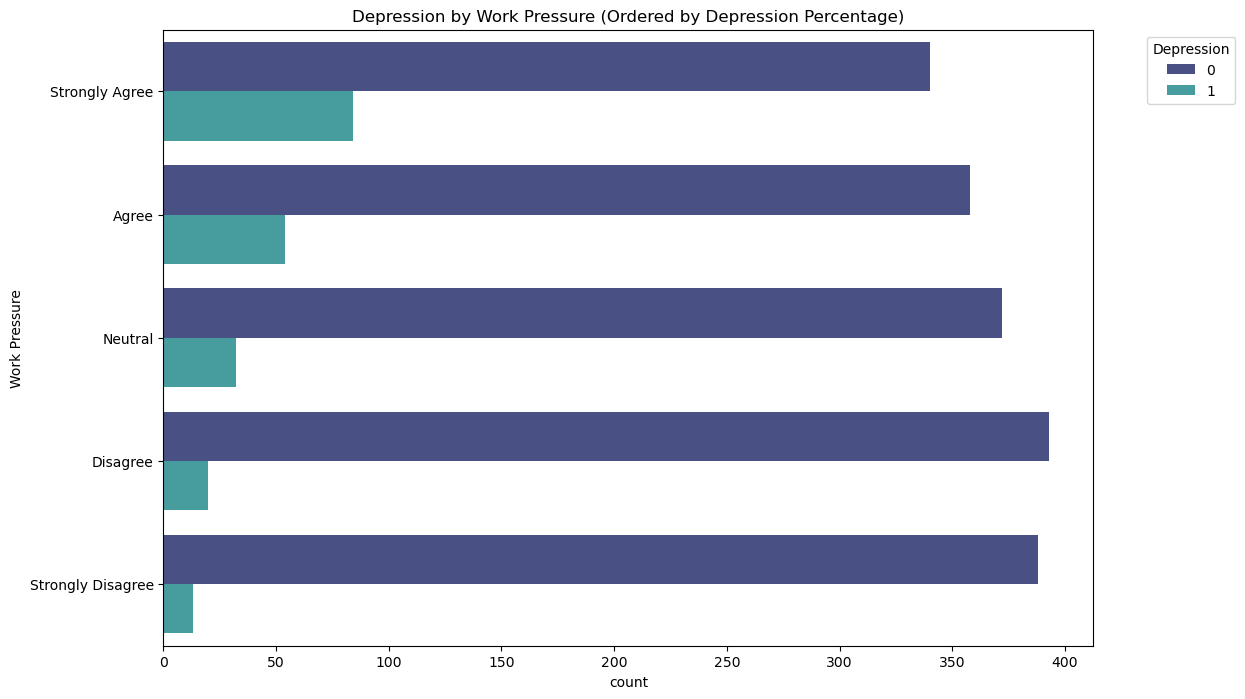

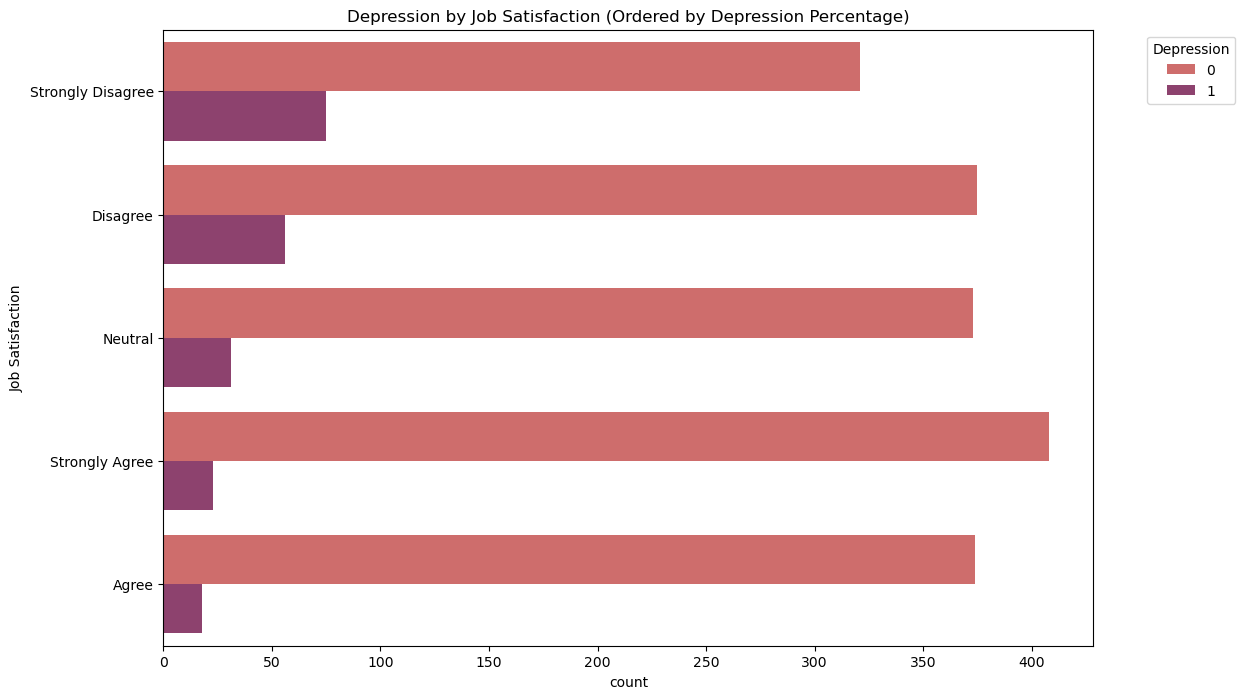

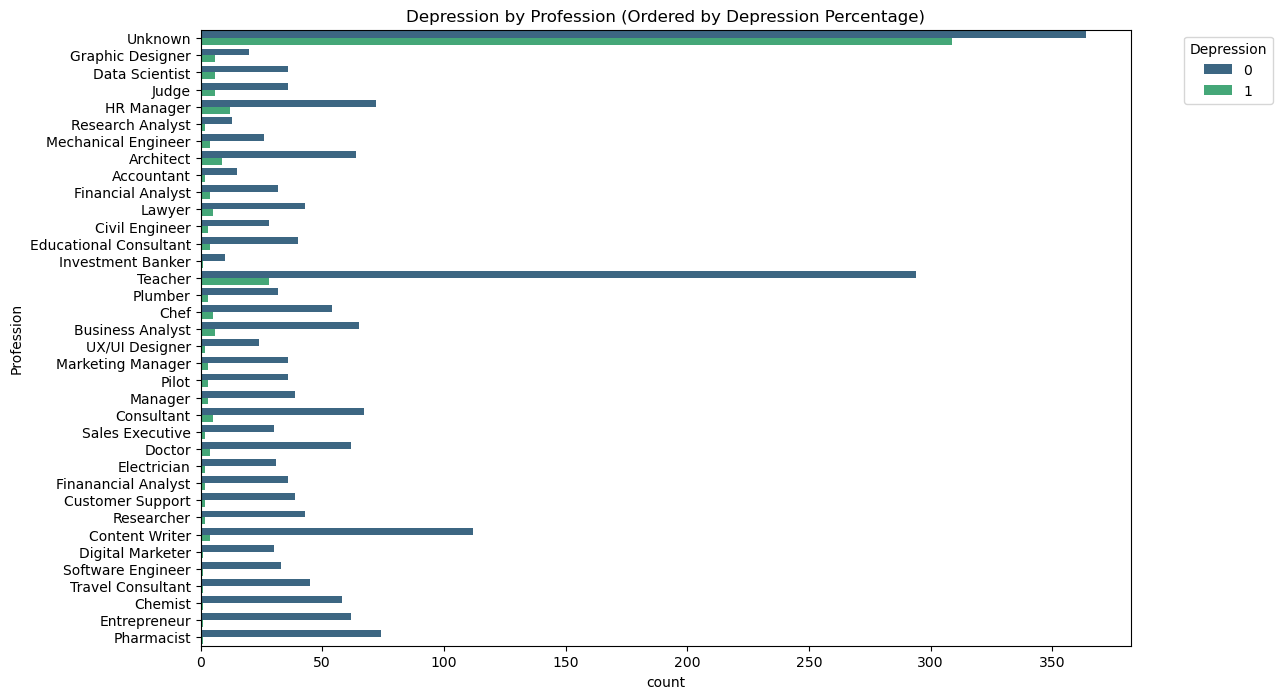

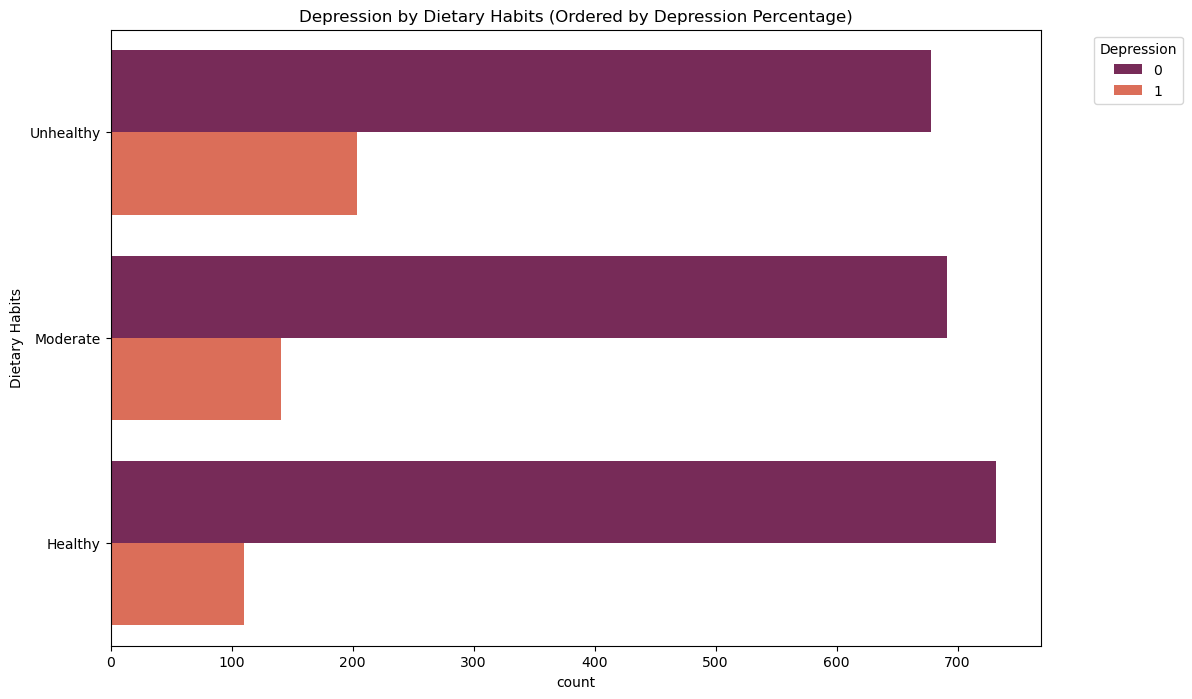

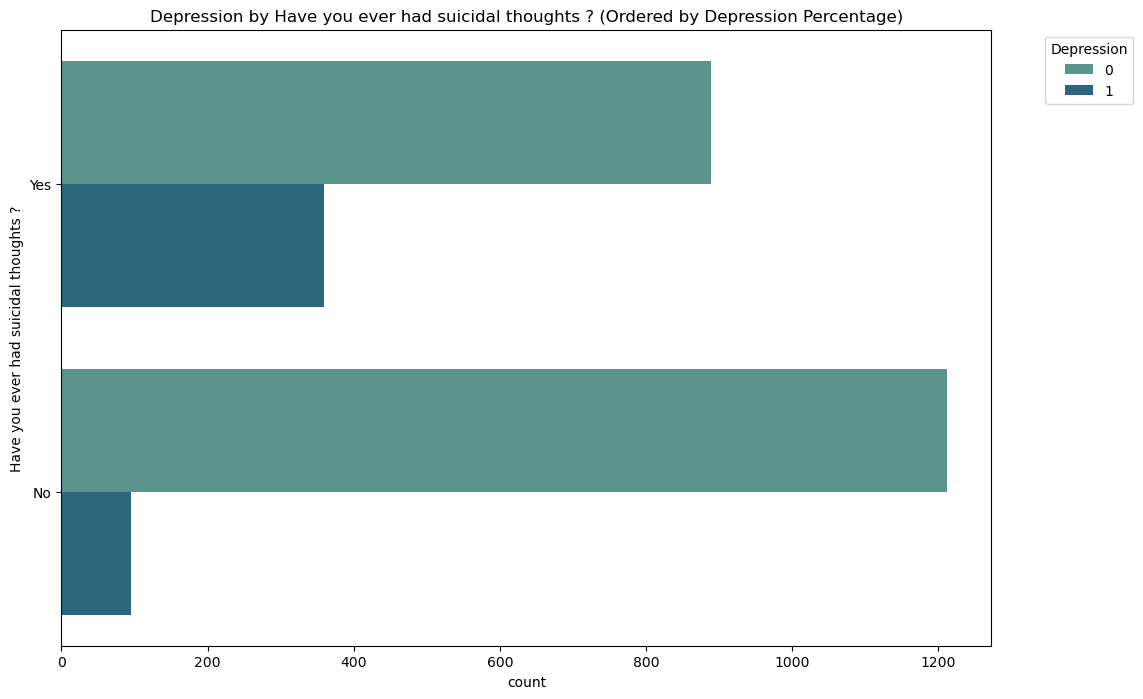

In [911]:
# List of categorical columns you want to analyze
categorical_columns = ['City','Degree', 'Work Pressure', 'Job Satisfaction', 'Profession','Dietary Habits','Have you ever had suicidal thoughts ?'] 
# Select all categorical columns
#categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Access the categorical data
categorical_data = data[categorical_columns]

# Color palettes for each plot
palettes = ["cubehelix", "magma", "mako", "flare", "viridis", "rocket", "crest"]

# Loop through each categorical column and generate the plot
for column, palette in zip(categorical_columns, palettes):
    plot_depression_by_category(data, column, palette=palette)


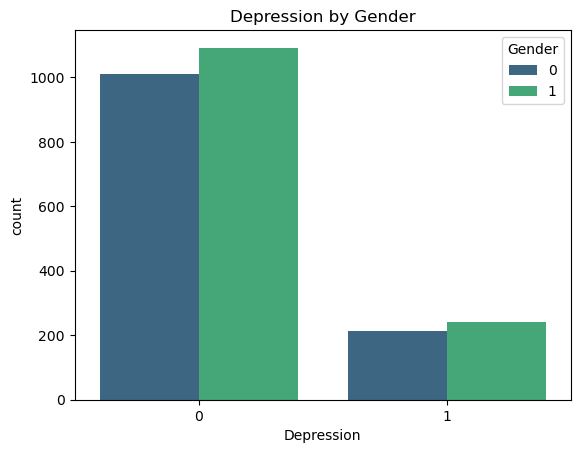

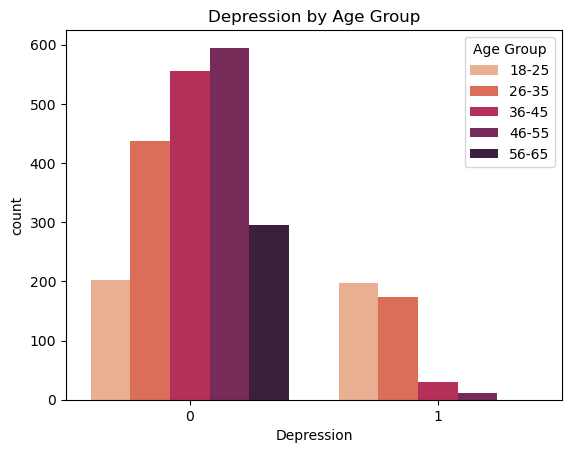

In [871]:
# Distribution of depression by gender
sns.countplot(x='Depression', hue='Gender', palette='viridis', data=data)
plt.title('Depression by Gender')
plt.show()

# Distribution of depression by age groups
data_age = data
data_age['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
sns.countplot(x='Depression', hue='Age Group', palette='rocket_r', data=data)
plt.title('Depression by Age Group')
plt.show()


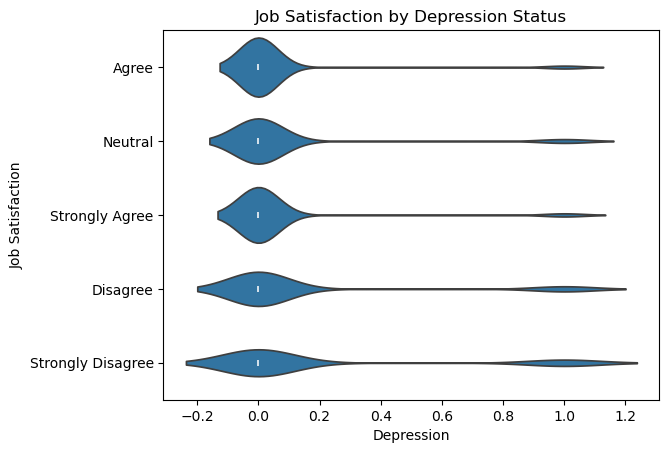

In [872]:
sns.violinplot(x='Depression', y='Job Satisfaction', data=data)
plt.title('Job Satisfaction by Depression Status')
plt.show()

## Feature Selection
### Identifying most relevant variables

In [899]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

# Impute remaining missing values
imputer = SimpleImputer(strategy='mean')
numeric_data = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Define features and target
X = numeric_data.drop(['Depression'], axis=1)
y = numeric_data['Depression']

# SelectKBest for top 10 features
best_features = SelectKBest(score_func=chi2, k='all').fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': best_features.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

                            Feature        Score
1                               Age  2315.350399
4                  Work/Study Hours   140.261678
7                 Suicidal Thoughts   103.693672
2   Working Professional or Student    88.008849
5                  Financial Stress    47.330547
3                    Sleep Duration     3.417174
6  Family History of Mental Illness     0.482395
0                            Gender     0.070541


#Final Insights

##### After building the model and evaluating feature importance, analyze findings for the most influential factors contributing to depression and highlight any patterns or anomalies. This comprehensive approach maximizes insights into the dataset, extracts important features, and ensures a well-rounded understanding of the underlying structure, facilitating evidence-based decisions or further research.